  bprice  


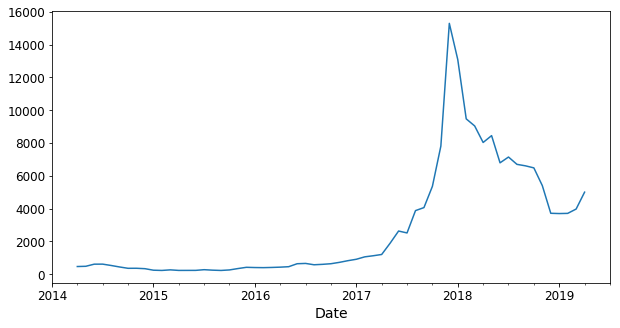

  sp  


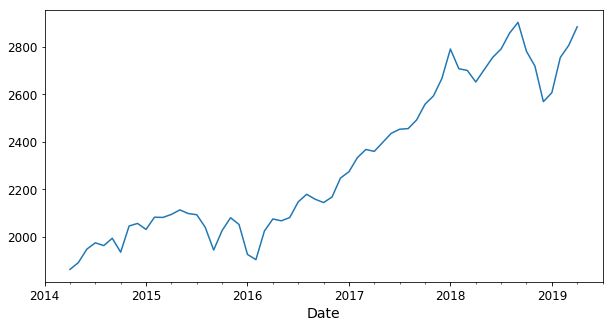

  oil  


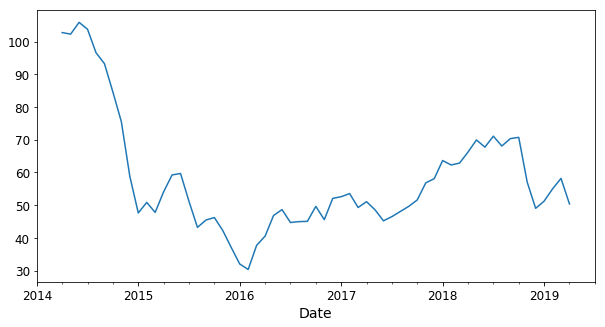

  forex  


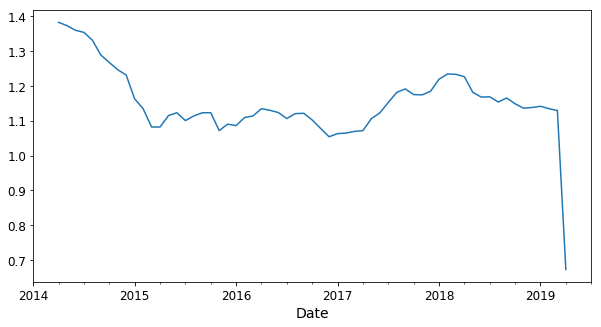

  goldprice  


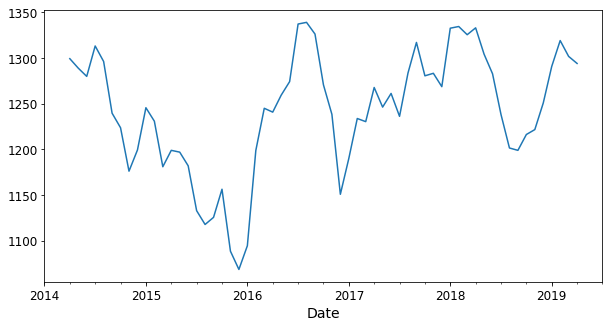

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1183.
Date:                Wed, 10 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:56:51   Log-Likelihood:                -16767.
No. Observations:                1825   AIC:                         3.354e+04
Df Residuals:                    1821   BIC:                         3.356e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.5562      0.195     43.908      0.0

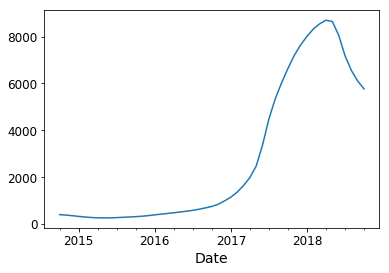

  seasonal Plot 


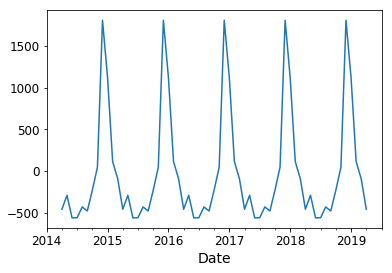

  resid Plot 


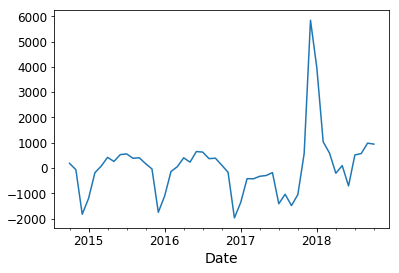

  observed Plot 


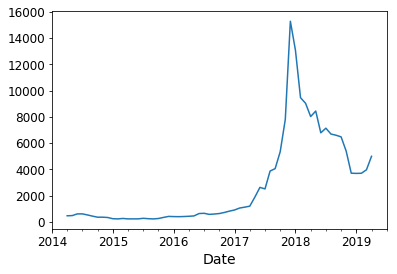

 sp 
  Trend Plot 


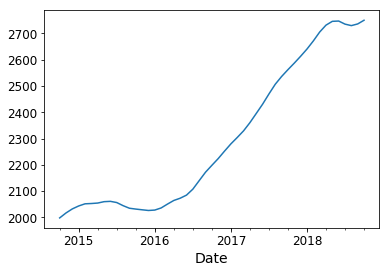

  seasonal Plot 


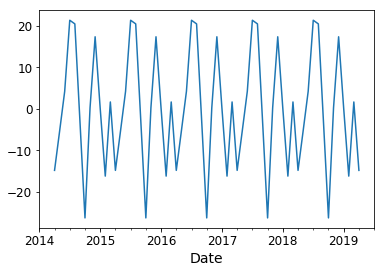

  resid Plot 


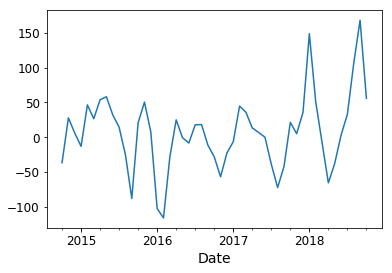

  observed Plot 


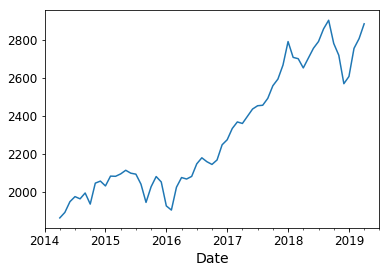

 oil 
  Trend Plot 


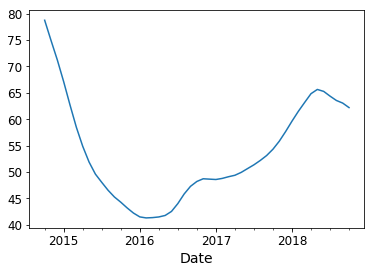

  seasonal Plot 


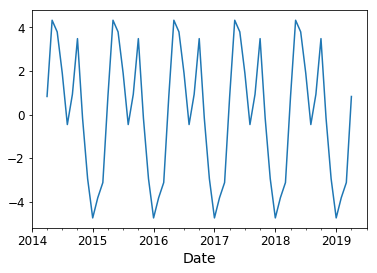

  resid Plot 


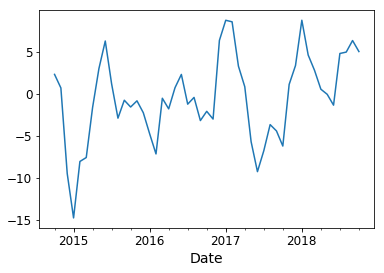

  observed Plot 


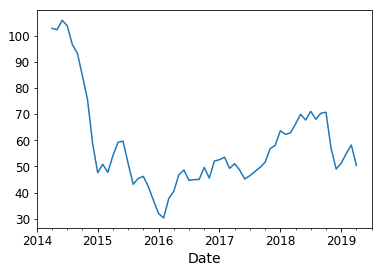

 forex 
  Trend Plot 


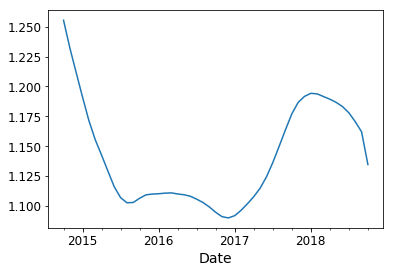

  seasonal Plot 


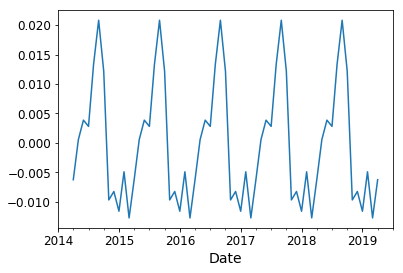

  resid Plot 


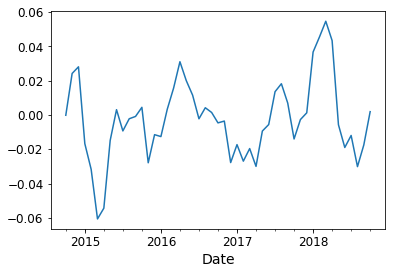

  observed Plot 


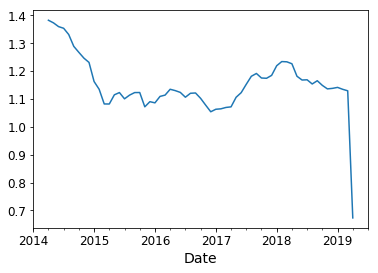

 goldprice 
  Trend Plot 


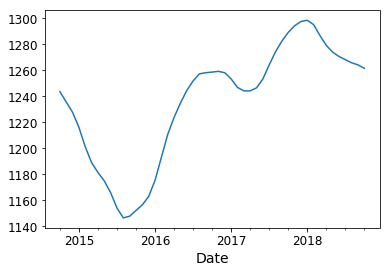

  seasonal Plot 


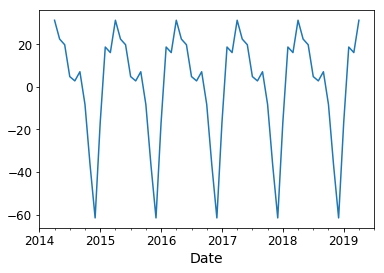

  resid Plot 


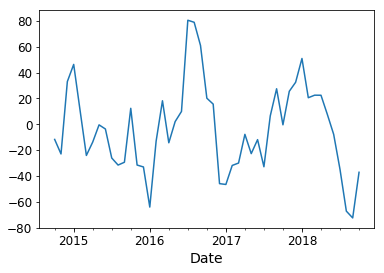

  observed Plot 


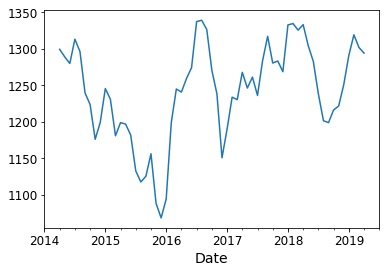

54.55 %...
63.64 %...
72.73 %...
81.82 %...


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import itertools

final_date = pd.read_csv(r'C:\Users\avanm\OneDrive\Desktop\Programming_for_DS\Assignment3\dataset.csv')
final_date.head()




final_date[['goldprice', 'sp', 'forex', 'oil']]=final_date[['goldprice', 'sp', 'forex', 'oil']].interpolate(method='linear',axis=0)
final_date = final_date.iloc[1:,:]
#final_date['date']=pd.to_datetime(final_date['date'],format='%Y/%m/%d')
final_date['Date']=pd.to_datetime(final_date['Date'],format='%m/%d/%Y')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
final_date.set_index('Date',inplace=True)


# ### q4

# In[4]:


for i in range(0,final_date.shape[1]):
    print('\033[1m ',final_date.columns[i],' \033[0;0m')
    y = final_date.iloc[0:,i].resample('MS').mean()
    y.plot(figsize=(10, 5))
    plt.show()


# ### q5

# In[5]:


X = final_date.iloc[:,1:]
y = final_date.iloc[:,0]
model = sm.OLS(np.array(y).reshape(-1,1),np.array(X).reshape(-1,4))
results = model.fit()
print(results.summary())


# #### The high R^2 shows us that the other variables are explaining about 70% of variation which is highly improbable because, the time series data are always highly correlated.

# ### q6

# In[6]:


from statsmodels.tsa.stattools import kpss
def rep_kpss(series,alpha=0.05,diff_max=6):
    diff = 0
    for i in range(0,diff_max):
        pval = kpss(series,regression='c')[1]
        if(pval>=alpha):
            return(diff,0,pval,'level stationary')
        pval = kpss(series,regression='ct')[1]
        if(pval>=alpha):
            return(diff,1,pval,'trend stationary')
        diff +=1
        series=series.diff().dropna()
        #return(0)
for i in final_date.columns:
    print(i)
    print(rep_kpss(final_date[i]))


# ### q7

# In[7]:


X = final_date.iloc[:,1:].diff().dropna()
y = final_date.iloc[1:,0]
model_diff = sm.OLS(np.array(y).reshape(-1,1),np.array(X).reshape(-1,4))
results_diff = model_diff.fit()
print(results_diff.summary())


# ### The R^2 suggests that there is no relationship between the series

# In[8]:


for i in range(0,final_date.shape[1]):
    print('\033[1m',final_date.columns[i],'\033[0;0m')
    y1 = final_date.iloc[0:,i].resample('MS').mean()
    decomposition = sm.tsa.seasonal_decompose(y1, model='additive')
    print(' \033[1m Trend Plot \033[0;0m')
    decomposition.trend.plot()
    plt.show()
    print(' \033[1m seasonal Plot \033[0;0m')
    decomposition.seasonal.plot()
    plt.show()
    print(' \033[1m resid Plot \033[0;0m')
    decomposition.resid.plot()
    plt.show()
    print(' \033[1m observed Plot \033[0;0m')
    decomposition.observed.plot()
    plt.show()


# ### q8

# In[9]:


final_date_2017 = final_date['2017':]


# ### q9

# In[10]:


from statsmodels.graphics.tsaplots import plot_acf
bprice_1d = final_date_2017['bprice'].diff().dropna()
final_date_2017 = final_date['2017':]
plot_acf(final_date_2017['bprice'],lags=50)
# suggests p 7:10


# In[11]:


plot_acf(bprice_1d,lags=20)


# In[12]:


from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(bprice_1d,lags=20)
# q=2


# In[13]:


from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(final_date_2017['bprice'][0:50])


# In[14]:


bprice = final_date_2017['bprice']


# ### q10

# #### good model for ARIMA. from acf and pacf, p is around 6-10 and q is 2.

# In[16]:


# https://www.statsmodels.org/stable/tsa.html
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.predict.html#statsmodels.tsa.arima_model.ARIMA.predict
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.ArmaProcess.html
# https://www.statsmodels.org/stable/tsa.html#autogressive-moving-average-processes-arma-and-kalman-filter
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html#statsmodels.tsa.arima_model.ARIMA
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.fit.html#statsmodels.tsa.arima_model.ARIMA.fit
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.html#statsmodels.tsa.arima_model.ARIMAResults
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.aic.html#statsmodels.tsa.arima_model.ARIMAResults.aic
bprice = final_date_2017['bprice']
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(bprice,order=(15,1,2))
r=model.fit()
r.aic


# In[17]:


from statsmodels.tsa.arima_model import ARIMA
maxa = 10
outp = np.zeros(((maxa+1)**2,3))
count = 0
for i in range(6,maxa+1):
    print((round(i*(maxa+1)/(maxa+1)**2*100,2)),'%...')
    for j in range(1,4):
        try:
            mod = ARIMA(bprice,order=(i,1,j))
            results = mod.fit()
            outp[count,:]= np.array([[i],[j],[results.aic]]).T
            count+=1
        except:
            continue
outp = pd.DataFrame(outp)
outp.columns = ['p','q','AIC']
outp = outp.loc[(outp!=0).any(axis=1)].sort_values('AIC')
print("best p and q are:",outp.iloc[0,:])


# ### best model

# In[18]:


mod = ARIMA(bprice,order=(9,1,2))
results = mod.fit()
print(results.summary())


# #### residual plot

# In[19]:


resid = pd.DataFrame(results.resid)
resid.plot()
plt.show()
resid.plot(kind='kde')
plt.show()


# #### it is really close to normal distribution

# In[20]:


resid.describe()


# In[21]:


sm.ProbPlot(resid).qqplot(line='s')


# ### the mean of residuals is really close to zero. This model with p,d,q = 9,1,2 best describes the above process

# ### q11

# ### prediction - one step ahead forecast validation

# In[24]:


pred = results.predict(start=pd.to_datetime('2018-08-01'), dynamic=False,typ='levels')
pred_ci = pred
ax = y['2018-09':].plot(label='observed')
pred.plot(ax=ax, label='One-step ahead Forecast', alpha=.8, figsize=(14, 7))
#ax.fill_between(pred_ci.index, pred_ci.iloc[:], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Value')
plt.legend()
plt.show()


# ### forecast

# In[22]:


from datetime import datetime  
from datetime import timedelta  
start_date = pd.to_datetime('2018-09-20')
end_date = start_date+timedelta(days=int(input('Forecast Days: ')))
fcast = results.predict(start=start_date,end = end_date, dynamic=False,typ='levels')
fcast_ci = fcast
ax = y['2018-08':].plot(label='observed')
results.plot_predict(start_date,end_date)
fig = results.plot_predict(start_date, end_date, dynamic=False, ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Value')
plt.legend()
plt.show()


# ### RMSE

# In[40]:


bitcoin_arima = results.forecast(steps=31)[0][1:]
bitcoin_future=pd.read_csv('bitcoin_future.csv')
np.sqrt((bitcoin_future['Closing'] - bitcoin_arima)**2).sum()


# In[41]:


bitcoin_arima


# ### q12 - Periodogram

# In[26]:


# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.periodogram.html
from statsmodels.tsa.stattools import periodogram
plt.plot(periodogram(bprice))
plt.show()
plt.plot(periodogram(bprice_1d))


# ### There is no seasonality

# #### Q13

# In[27]:


final_1d = final_date_2017.diff().dropna()
final_1d
from statsmodels.tsa.vector_ar import var_model
var= var_model.VAR(final_1d)
np.argmin(var.select_order().ics['aic'])
var_results = var.fit(maxlags=1)
var_results.summary()


# In[28]:


resid.columns
resid = pd.DataFrame(var_results.resid)
for i in resid.columns:
    print(i)
    resid[i].plot()
    plt.show()
    resid[i].plot(kind='kde')
    plt.show()


# In[29]:


resid.describe()


# #### All the residuals are very close to zero, this suggests that the VAR model of lag 1 fits the above data very good.

# ### q14

# In[30]:


final_1d.tail()


var_results.plot_forecast(steps=30,alpha=0.05)


# In[37]:


var_forecast = var_results.forecast(var_results.y,steps=30)
bitcoin_var_op = var_forecast[:,0]
bitcoin_forcast_var = bprice[-1]+np.cumsum(bitcoin_var_op)


# In[38]:


bitcoin_future=pd.read_csv('bitcoin_future.csv')
np.sqrt((bitcoin_future['Closing']-bitcoin_forcast_var)**2).sum()


# #### rmse is around 4600

# In[39]:


bitcoin_forcast_var

